In [1]:
import bz2

import pandas as pd
import numpy as np

In [2]:
def load_minimal_distance(file_path: str) -> pd.DataFrame:
    with bz2.BZ2File(file_path, 'rb') as file:
        return pd.read_pickle(file)

In [3]:
all_minimal_distances = {
    'Android': load_minimal_distance('../data/minimal_distances/android.pickle.bz2'),
    'Visual Studio Code': load_minimal_distance('../data/minimal_distances/vscode.pickle.bz2'),
    'React': load_minimal_distance('../data/minimal_distances/react.pickle.bz2'),
    'Microsoft': load_minimal_distance('../data/minimal_distances/microsoft.pickle.bz2'),
    'Spotify': load_minimal_distance('../data/minimal_distances/spotify.pickle.bz2'),
    'Trivago': load_minimal_distance('../data/minimal_distances/trivago.pickle.bz2'),
}

# Topological distances

In [4]:
topological_distances = []
for name, mp in all_minimal_distances.items():
    topological_distances += [mp.shortest.value_counts(normalize=True).rename(name)]
topological_distances = pd.concat(topological_distances, axis=1).sort_index().cumsum()

In [5]:
topological_distances.to_csv('../reports/csv/topological_distances.csv', index_label='index', float_format='%g')

<Axes: xlabel='shortest'>

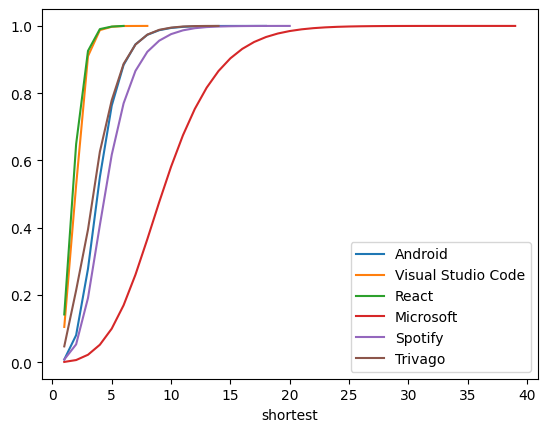

In [6]:
topological_distances.plot()

In [7]:
topological_distances.idxmax()

Android               18
Visual Studio Code     8
React                  6
Microsoft             39
Spotify               20
Trivago               14
dtype: int64

In [8]:
topological_distances[topological_distances<=0.5]

,Android,Visual Studio Code,React,Microsoft,Spotify,Trivago
shortest,,,,,,
1,0.008056,0.104974,0.142049,0.000896,0.008066,0.047100
2,0.080508,NaN,NaN,0.006471,0.053173,0.213884
3,0.277938,NaN,NaN,0.022226,0.191014,0.394621
4,NaN,NaN,NaN,0.051996,0.407703,NaN
5,NaN,NaN,NaN,0.099806,NaN,NaN
6,NaN,NaN,NaN,0.169439,NaN,NaN
7,NaN,NaN,NaN,0.260327,NaN,NaN
8,NaN,NaN,NaN,0.365894,NaN,NaN
9,NaN,NaN,NaN,0.476074,NaN,NaN


In [9]:
topological_distances[topological_distances<=0.5].idxmax()

Android               3
Visual Studio Code    1
React                 1
Microsoft             9
Spotify               4
Trivago               3
dtype: int64

---

# Temporal distances

In [10]:
temporal_distances = []
for name, mp in all_minimal_distances.items():
    s = (mp.fastest/np.timedelta64(1, 'h')).astype(int).value_counts(normalize=True).rename(name)
    idx_min, idx_max = s.index.min(), s.index.max()+1
    temporal_distances += [s.reindex(range(idx_min, idx_max), fill_value=0)]
temporal_distances = pd.concat(temporal_distances, axis=1).sort_index().cumsum()

In [14]:
temporal_distances[temporal_distances <= 0.5].idxmax() // 24

Android                6
Visual Studio Code     1
React                  3
Microsoft             14
Spotify                6
Trivago                5
dtype: int64

In [11]:
temporal_distances.idxmax() // 24

Android               27
Visual Studio Code    26
React                 26
Microsoft             27
Spotify               26
Trivago               25
dtype: int64

<Axes: xlabel='fastest'>

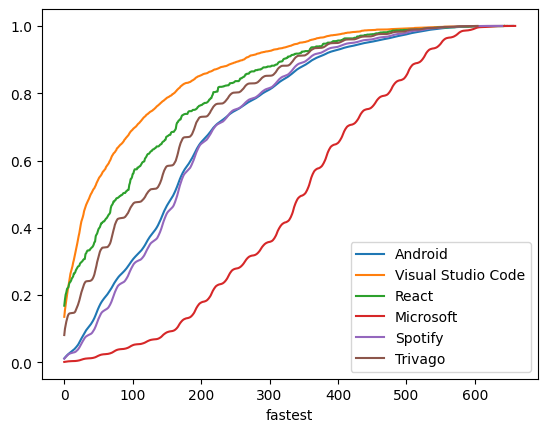

In [12]:
temporal_distances.plot()

In [13]:
temporal_distances.to_csv('../reports/csv/temporal_distances.csv', index_label='index', float_format='%g')